# Explicación muy breve de esta imagen:
![alt text](https://pbs.twimg.com/media/D3y7CU9X4AEgL4O.jpg "Logo Title Text 1")

## Generación de GRMD simplificado
**GRMD**: *general-relativistic magnetohydrodynamic*

In [20]:
def CircEq(x,y,r,th):
    """
    Retorna verdadero si a entra dentro del intervalo
    r +/- th y falso en caso contrario
    """
    a = (x-X/2)**2+(y-Y/2)**2
    b = r**2
    if a <= b+th and a >= b-th:
        return True
    else:
        return False

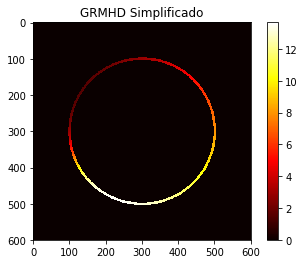

In [80]:
import numpy as np
import matplotlib.pyplot as plt

Y = 600
X = Y
GRMHD = np.zeros([X,Y])
for i in range(X):
    for j in range(Y):
        if CircEq(i,j,200,(37)**2):
            GRMHD[i][j] = 10*np.cos((np.angle((i-200)+(1j*j-200))))+10 

#Grafica            
fig, ax = plt.subplots()
ims = ax.imshow(GRMHD,cmap='hot')
ax.set_title("GRMHD Simplificado")
fig.colorbar(ims)
plt.show()

## Patrón de una antena parabólica 
Entre mayor sea el diametro del disco, más estrecho será la extención angular del lóbulo principal.
![alt text](http://gpbt.info/wp-content/uploads/2019/01/homemade-satellite-dish-stand-this-is-a-simplified-drawing-of-the-dish-radiation-pattern-we-always-think-of-a-dish-as-a-sort-of-searchlight-looking-for-the-sat-signal.jpg "Logo Title Text 1")

## Patrón de antena del radiotelescopio equivalente
El método por el cual fue obtenida la radioimagen del agujero negro es complejo y muy poco intuitivo. Para simplificar el proceso supondremos que fue obtenida por un radiotelescopio con un disco del tamaño de la Tierra

### Distribución geográfica de los radiotelescopios usados
![alt text](https://upload.wikimedia.org/wikipedia/commons/e/eb/The_Event_Horizon_Telescope_and_Global_mm-VLBI_Array_on_the_Earth.jpg "Logo Title Text 1")

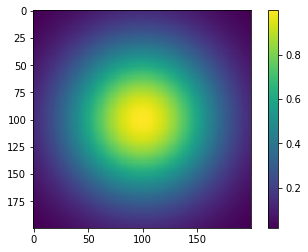

In [76]:
# resolución angulat = 60 microarcosegundos
x, y = np.meshgrid(np.linspace(-1,1,200), np.linspace(-1,1,200))
d = np.sqrt(x*x+y*y)
sigma, mu = 0.5, 0.0
g = np.exp(-((d-mu)**2/( 2.0 * sigma**2)))

#Gráfica
fig,ax = plt.subplots()
gim = ax.imshow(g)
fig.colorbar(gim)
plt.show()

# La razón de la imagen borrosa

## Convolución:
$ f(x,y)\ast g(x,y) = \int \limits_{\tau_1=-\infty}^{\infty} \int \limits_{\tau_2=-\infty}^{\infty} f(\tau_1 , \tau_2) \cdot g(x-\tau_1,y-\tau_2) \cdot d\tau_1 d\tau_2$

In [79]:
from scipy import signal

RIM = signal.convolve2d(GRMHD,g)

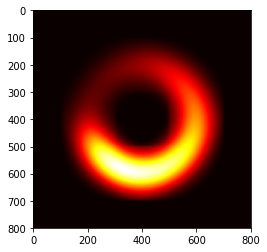

In [78]:
plt.imshow(RIM,cmap = 'hot')
plt.show()